# Jupyter Notebook on Detecting Spying Webcams

In this project, we implement machine learning models that detect webcam spying by means of packet capturing. There were three steps in this project.

0. Data Speculation from example pcap files.

1. Capturing packet traces under different conditions: with/without the spying; and various webcam usages - **(0) nothing, (1) only spying, (2) WeChat Video Call, (3) Wechat Video Call while also spying, (4) Zoom Video Conferencing, (5) Zoom Video Conferencing while also spying.**


2. Feature Generation


3. Training and evaluating supervised models for both multiclass (the 6 scenarios) and binary classifications (spying vs non-spying).


4. Evaluating unsupervised models for binary classification.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import logging
logging.getLogger("scapy.runtime").setLevel(logging.ERROR)

from netml.pparser.parser import PCAP
from netml.utils.tool import dump_data, load_data

import pandas as pd
import numpy as np
from IPython.display import clear_output

## Part 0: Data Speculation

In [2]:
example_pcap_n = PCAP('data/n_2.pcap')
example_pcap_s = PCAP('data/s_9.pcap')
example_pcap_w = PCAP('data/w_4.pcap')
example_pcap_ws = PCAP('data/w+s_5.pcap')
example_pcap_z = PCAP('data/z_6.pcap')
example_pcap_zs = PCAP('data/z+s_7.pcap')

In [3]:
# We unify the source ip, destination ip, source port, destination port
# and protocol for every packets, so that we can treat them as one "flow"
def ip_protocol_agnostic(flows):
    agnostic_flows = []
    dummy_tuple = ('1.1.1.1', '2.2.2.2', 5000, 5000, 6)
    for flow in flows:
        agnostic_flows.append((dummy_tuple,flow[1]))
    return agnostic_flows

In [4]:
example_pcap_n.pcap2flows()
example_pcap_s.pcap2flows()
example_pcap_w.pcap2flows()
example_pcap_ws.pcap2flows()
example_pcap_z.pcap2flows()
example_pcap_zs.pcap2flows()
clear_output(wait=False)

In [5]:
example_pcap_n.flow2features('SAMP_SIZE')
example_pcap_s.flow2features('SAMP_SIZE')
example_pcap_w.flow2features('SAMP_SIZE')
example_pcap_ws.flow2features('SAMP_SIZE')
example_pcap_z.flow2features('SAMP_SIZE')
example_pcap_zs.flow2features('SAMP_SIZE')
clear_output(wait=False)

In [6]:

df_example_n = pd.DataFrame(example_pcap_n.features)
df_example_s = pd.DataFrame(example_pcap_s.features)
df_example_w = pd.DataFrame(example_pcap_w.features)
df_example_ws = pd.DataFrame(example_pcap_ws.features)
df_example_z = pd.DataFrame(example_pcap_z.features)
df_example_zs = pd.DataFrame(example_pcap_zs.features)

In [7]:
agnostic_sampsize_n = df_example_n.sum(axis=0)
agnostic_sampsize_s = df_example_s.sum(axis=0)
agnostic_sampsize_w = df_example_w.sum(axis=0)
agnostic_sampsize_ws = df_example_ws.sum(axis=0)
agnostic_sampsize_z = df_example_z.sum(axis=0)
agnostic_sampsize_zs = df_example_zs.sum(axis=0)

In [8]:
example_pcap_n.flow2features('SAMP_NUM')
example_pcap_s.flow2features('SAMP_NUM')
example_pcap_w.flow2features('SAMP_NUM')
example_pcap_ws.flow2features('SAMP_NUM')
example_pcap_z.flow2features('SAMP_NUM')
example_pcap_zs.flow2features('SAMP_NUM')

'_flow2features()' starts at 2022-12-07 12:59:31
True
'_flow2features()' ends at 2022-12-07 12:59:31 and takes 0.0001 mins.
'_flow2features()' starts at 2022-12-07 12:59:31
True
'_flow2features()' ends at 2022-12-07 12:59:32 and takes 0.0121 mins.
'_flow2features()' starts at 2022-12-07 12:59:32
True
'_flow2features()' ends at 2022-12-07 12:59:32 and takes 0.0011 mins.
'_flow2features()' starts at 2022-12-07 12:59:32
True
'_flow2features()' ends at 2022-12-07 12:59:32 and takes 0.0049 mins.
'_flow2features()' starts at 2022-12-07 12:59:32
True
'_flow2features()' ends at 2022-12-07 12:59:32 and takes 0.0009 mins.
'_flow2features()' starts at 2022-12-07 12:59:32
True
'_flow2features()' ends at 2022-12-07 12:59:33 and takes 0.0108 mins.


In [9]:
df_example_n = pd.DataFrame(example_pcap_n.features)
df_example_s = pd.DataFrame(example_pcap_s.features)
df_example_w = pd.DataFrame(example_pcap_w.features)
df_example_ws = pd.DataFrame(example_pcap_ws.features)
df_example_z = pd.DataFrame(example_pcap_z.features)
df_example_zs = pd.DataFrame(example_pcap_zs.features)

In [10]:
agnostic_sampnum_n = df_example_n.sum(axis=0)
agnostic_sampnum_s = df_example_s.sum(axis=0)
agnostic_sampnum_w = df_example_w.sum(axis=0)
agnostic_sampnum_ws = df_example_ws.sum(axis=0)
agnostic_sampnum_z = df_example_z.sum(axis=0)
agnostic_sampnum_zs = df_example_zs.sum(axis=0)

In [11]:
list_sampsize = [agnostic_sampsize_n, agnostic_sampsize_s, 
                 agnostic_sampsize_w, agnostic_sampsize_ws,
                 agnostic_sampsize_z, agnostic_sampsize_zs]
list_sampnum = [agnostic_sampnum_n, agnostic_sampnum_s, 
                agnostic_sampnum_w, agnostic_sampnum_ws,
                agnostic_sampnum_z, agnostic_sampnum_zs]


In [12]:
import math
def get_aligned_df(list_feat):
    aligned_list = []
    min_length = math.inf
    for feat in list_feat:
        if feat.size < min_length:
            min_length = feat.size
    for feat in list_feat:
        aligned_list.append(feat)
    aligned_df = pd.DataFrame(aligned_list).fillna(0)
    return aligned_df

In [13]:
aligned_sampsize_df = get_aligned_df(list_sampsize)
aligned_sampnum_df = get_aligned_df(list_sampnum)

<AxesSubplot: >

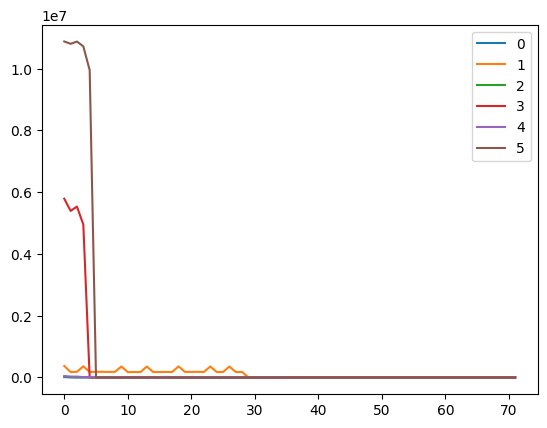

In [14]:
aligned_sampsize_df.transpose().plot()

<AxesSubplot: >

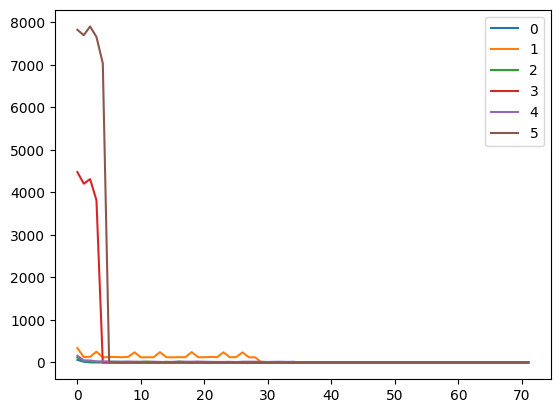

In [15]:
aligned_sampnum_df.transpose().plot()

We can see that there are significant variations in samp_num and samp_size among the 6 example pcaps (one from each scenario). We decide to go with these two features.

## Part 1: Packet Capture

* Importing Required Libraries

* Randomly Select certain number (now is 15) of instances from each scenario

In [16]:
# We need 6 pairs of lists of data indices, each for one scenario, 
# to select from our collected data. 
# Tuples are ([Training Indices, Testing Indices]).
import random
random.seed(10)
# Change this number to tweak the train/test split sizes
NUM_DATA_FOR_TRAINING = 15

# A list that contains integers from 0 to 19
# for getting corresponding tests through set minusing
list_all_20 = list(range(20))

# Randomly sample train indices from 0 to 19
train_n = random.sample(range(20), NUM_DATA_FOR_TRAINING)
train_s = random.sample(range(20), NUM_DATA_FOR_TRAINING)
train_w = random.sample(range(20), NUM_DATA_FOR_TRAINING)
train_ws = random.sample(range(20), NUM_DATA_FOR_TRAINING)
train_z = random.sample(range(20), NUM_DATA_FOR_TRAINING)
train_zs = random.sample(range(20), NUM_DATA_FOR_TRAINING)

# This is a helper function that returns the set minusing
# result of list_all_20 and the list of indices for training
def get_corresponding_test(train_list):
    temp = []
    for element in list_all_20:
        if element not in train_list:
            temp.append(element)
    return temp

# We get the corresponding test indices for each scenario
test_n = get_corresponding_test(train_n)
test_s = get_corresponding_test(train_s)
test_w = get_corresponding_test(train_w)
test_ws = get_corresponding_test(train_ws)
test_z = get_corresponding_test(train_z)
test_zs = get_corresponding_test(train_zs)

# A function that converts the index list into
# file name lists for PCAP reading
def get_full_file_name(index_list, scenario_letters):
    res = []
    for index in index_list:
        res.append("data/"+scenario_letters+"_"+str(index+1)+".pcap")
    return res

# Getting full file names for the training index lists
train_n = get_full_file_name(train_n, 'n')
train_s = get_full_file_name(train_s, 's')
train_w = get_full_file_name(train_w, 'w')
train_ws = get_full_file_name(train_ws, 'w+s')
train_z = get_full_file_name(train_z, 'z')
train_zs = get_full_file_name(train_zs, 'z+s')

# Getting full file names for the testing index lists
test_n = get_full_file_name(test_n, 'n')
test_s = get_full_file_name(test_s, 's')
test_w = get_full_file_name(test_w, 'w')
test_ws = get_full_file_name(test_ws, 'w+s')
test_z = get_full_file_name(test_z, 'z')
test_zs = get_full_file_name(test_zs, 'z+s')

In [17]:
# This function returns a list of list of
# flows for further processing from the list
# of file names passed in
# All flows converted within each PCAP are
# concatenated into one list
def get_listof_listof_flows(list_filename):
    all_flows = []
    for filename in list_filename:
        tmp_pcap = PCAP(filename)
        tmp_pcap.pcap2flows()
        all_flows.append(tmp_pcap.flows)
    return all_flows

# Generating lists of lists of flows for the training portions
list_train_n = get_listof_listof_flows(train_n)
list_train_s = get_listof_listof_flows(train_s)
list_train_w = get_listof_listof_flows(train_w)
list_train_ws = get_listof_listof_flows(train_ws)
list_train_z = get_listof_listof_flows(train_z)
list_train_zs = get_listof_listof_flows(train_zs)

# Generating lists of lists of flows for the testing portions
list_test_n = get_listof_listof_flows(test_n)
list_test_s = get_listof_listof_flows(test_s)
list_test_w = get_listof_listof_flows(test_w)
list_test_ws = get_listof_listof_flows(test_ws)
list_test_z = get_listof_listof_flows(test_z)
list_test_zs = get_listof_listof_flows(test_zs)

# We clear the output here as the PCAP structs
# would likely have a lot of messages printed
clear_output(wait=False)

## Part 2: Feature Generation

In [18]:
# This helper function generates ipagnostic 
# (i.e., taking everything as one 'flow') 
# numbers of packets during a certain time interval
def get_ipagnostic_samp_nums(listof_listof_flows):
    # dummy pcap instance for feature generation
    tmp_pcap = PCAP("data/n_1.pcap")
    tmp_pcap.pcap2flows()
    dflist_ipagnostic = []
    for listof_flows in listof_listof_flows:
        tmp_pcap.flows = listof_flows
        tmp_pcap.flow2features('SAMP_NUM')
        df_tmp = pd.DataFrame(tmp_pcap.features)
        df_agnostic_tmp = df_tmp.sum(axis=0)
        dflist_ipagnostic.append(df_agnostic_tmp)
    return pd.DataFrame(dflist_ipagnostic).fillna(0)
    
# This helper function generates ipagnostic 
# (i.e., taking everything as one 'flow') 
# total sizes of packets during a certain time interval
def get_ipagnostic_samp_sizes(listof_listof_flows):
    # dummy pcap instance for feature generation
    tmp_pcap = PCAP("data/n_1.pcap")
    tmp_pcap.pcap2flows()
    dflist_ipagnostic = []
    for listof_flows in listof_listof_flows:
        tmp_pcap.flows = listof_flows
        tmp_pcap.flow2features('SAMP_SIZE')
        df_tmp = pd.DataFrame(tmp_pcap.features)
        df_agnostic_tmp = df_tmp.sum(axis=0)
        dflist_ipagnostic.append(df_agnostic_tmp)
    return pd.DataFrame(dflist_ipagnostic).fillna(0)

### 1. Generating Features For Multiclass Classification

     1.1 Generating Training Data

In [19]:
# Generate packet-level samp_num features for each scenario
# using the lists of flows previously concatenated
sampnums_train_n = get_ipagnostic_samp_nums(list_train_n)
sampnums_train_s = get_ipagnostic_samp_nums(list_train_s)
sampnums_train_w = get_ipagnostic_samp_nums(list_train_w)
sampnums_train_ws = get_ipagnostic_samp_nums(list_train_ws)
sampnums_train_z = get_ipagnostic_samp_nums(list_train_z)
sampnums_train_zs = get_ipagnostic_samp_nums(list_train_zs)

# Generate packet-level samp_size features for each scenario
# using the lists of flows previously concatenated
sampsizes_train_n = get_ipagnostic_samp_sizes(list_train_n)
sampsizes_train_s = get_ipagnostic_samp_sizes(list_train_s)
sampsizes_train_w = get_ipagnostic_samp_sizes(list_train_w)
sampsizes_train_ws = get_ipagnostic_samp_sizes(list_train_ws)
sampsizes_train_z = get_ipagnostic_samp_sizes(list_train_z)
sampsizes_train_zs = get_ipagnostic_samp_sizes(list_train_zs)

# We clear outputs here as it would take up too much space
clear_output(wait=False)

In [20]:
# We assign each scenario a label
# n<-0, s<-1, w<-2, ws<-3, z<-4, zs<-5
sampsizes_train_n["label"] = 0
sampsizes_train_s["label"] = 1
sampsizes_train_w["label"] = 2
sampsizes_train_ws["label"] = 3
sampsizes_train_z["label"] = 4
sampsizes_train_zs["label"] = 5

In [21]:
# We concatenate features from every scenario into whole dataframes for training
# We also concatenate labels in the same order
sampnums_all = pd.concat([sampnums_train_n, sampnums_train_s, sampnums_train_z, sampnums_train_zs, sampnums_train_w, sampnums_train_ws], axis=0).iloc[:,:50]
sampsizes_all = pd.concat([sampsizes_train_n, sampsizes_train_s, sampsizes_train_z, sampsizes_train_zs, sampsizes_train_w, sampsizes_train_ws], axis=0).iloc[:,:50]
both_features_train_multi =  pd.concat([sampnums_all,sampsizes_all], axis=1).fillna(0)

labels_multi = pd.concat([sampsizes_train_n, sampsizes_train_s, sampsizes_train_z, sampsizes_train_zs, sampsizes_train_w, sampsizes_train_ws], axis=0)["label"]

    1.2 Generating Testing Data

In [22]:
# We similarly generate the features for our test data
sampnums_test_n = get_ipagnostic_samp_nums(list_test_n)
sampnums_test_s = get_ipagnostic_samp_nums(list_test_s)
sampnums_test_w = get_ipagnostic_samp_nums(list_test_w)
sampnums_test_ws = get_ipagnostic_samp_nums(list_test_ws)
sampnums_test_z = get_ipagnostic_samp_nums(list_test_z)
sampnums_test_zs = get_ipagnostic_samp_nums(list_test_zs)

sampsizes_test_n = get_ipagnostic_samp_sizes(list_test_n)
sampsizes_test_s = get_ipagnostic_samp_sizes(list_test_s)
sampsizes_test_w = get_ipagnostic_samp_sizes(list_test_w)
sampsizes_test_ws = get_ipagnostic_samp_sizes(list_test_ws)
sampsizes_test_z = get_ipagnostic_samp_sizes(list_test_z)
sampsizes_test_zs = get_ipagnostic_samp_sizes(list_test_zs)
clear_output(wait=False)

In [23]:
# We label the test data correspondingly as well
sampsizes_test_n["label"] = 0
sampsizes_test_s["label"] = 1
sampsizes_test_w["label"] = 2
sampsizes_test_ws["label"] = 3
sampsizes_test_z["label"] = 4
sampsizes_test_zs["label"] = 5

In [24]:
# Likewise, we concatenate all features and label data in sequence
sampnums_all_test = pd.concat([sampnums_test_n, sampnums_test_s, sampnums_test_z, sampnums_test_zs, sampnums_test_w, sampnums_test_ws], axis=0).iloc[:,:50]
sampsizes_all_test = pd.concat([sampsizes_test_n, sampsizes_test_s, sampsizes_test_z, sampsizes_test_zs, sampsizes_test_w, sampsizes_test_ws], axis=0).iloc[:,:50]
both_features_test_multi =  pd.concat([sampnums_all_test,sampsizes_all_test], axis=1).fillna(0)
labels_test_multi = pd.concat([sampsizes_test_n, sampsizes_test_s, sampsizes_test_z, sampsizes_test_zs, sampsizes_test_w, sampsizes_test_ws], axis=0)["label"]

### 2. Generating Features and Labels for Binary Classification: Spy vs Non-Spy

In [25]:
# As our research interest lies mainly in detecting if there is any
# camera spying, let's categorize our data int spied and unspied conditions
# This increases data size (and thus accuracy) and mitigates overfitting
list_train_unspied = list_train_n + list_train_w + list_train_z
list_train_spied =  list_train_s + list_train_ws + list_train_zs

# Generating samp_num and samp_size features for spied and unspied flows
sampnums_train_unspied = get_ipagnostic_samp_nums(list_train_unspied)
sampnums_train_spied = get_ipagnostic_samp_nums(list_train_spied)

sampsizes_train_unspied = get_ipagnostic_samp_sizes(list_train_unspied)
sampsizes_train_spied = get_ipagnostic_samp_sizes(list_train_spied)

# We clear the output as the previous operations would be printing out too many messages
clear_output(wait=False)

sampnums_both = pd.concat([sampnums_train_unspied,sampnums_train_spied]).fillna(0)
sampsizes_both = pd.concat([sampsizes_train_unspied,sampsizes_train_spied]).fillna(0)

sampsizes_train_unspied["label"] = 0
sampsizes_train_spied["label"] = 1
labels_bin = pd.concat([sampsizes_train_unspied["label"], sampsizes_train_spied["label"]])
sampsizes_train_unspied = sampsizes_train_unspied.drop("label",axis=1)
sampsizes_train_spied = sampsizes_train_spied.drop("label",axis=1)

features_both = pd.concat([sampnums_both.iloc[:,:50],sampsizes_both.iloc[:,:50]],axis=1)

In [26]:
# As our research interest lies mainly in detecting if there is any
# camera spying, let's categorize our data int spied and unspied conditions
# This increases data size (and thus accuracy) and mitigates overfitting
list_test_unspied = list_test_n + list_test_w + list_test_z
list_test_spied =  list_test_s + list_test_ws + list_test_zs

# Generating samp_num and samp_size features for spied and unspied flows
sampnums_test_unspied = get_ipagnostic_samp_nums(list_test_unspied)
sampnums_test_spied = get_ipagnostic_samp_nums(list_test_spied)

sampsizes_test_unspied = get_ipagnostic_samp_sizes(list_test_unspied)
sampsizes_test_spied = get_ipagnostic_samp_sizes(list_test_spied)

# We clear the output as the previous operations would be printing out too many messages
clear_output(wait=False)

sampnums_both_test = pd.concat([sampnums_test_unspied,sampnums_test_spied]).fillna(0)
sampsizes_both_test = pd.concat([sampsizes_test_unspied,sampsizes_test_spied]).fillna(0)

sampsizes_test_unspied["label"] = 0
sampsizes_test_spied["label"] = 1
labels_bin_test = pd.concat([sampsizes_test_unspied["label"], sampsizes_test_spied["label"]])
sampsizes_test_unspied = sampsizes_test_unspied.drop("label",axis=1)
sampsizes_test_spied = sampsizes_test_spied.drop("label",axis=1)

features_both_test = pd.concat([sampnums_both_test.iloc[:,:50],sampsizes_both_test.iloc[:,:50]],axis=1)

## Part 3: Supervised model

    3.1 Multi-class Classificatoin

* Trying out `Random Forest`:

In [27]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf_model_multi = RandomForestClassifier(random_state=42,n_jobs=-1,n_estimators=200,class_weight="balanced")
rf_model_multi.fit(both_features_train_multi,labels_multi)
rf_multi_pred = rf_model_multi.predict(both_features_test_multi)

In [28]:
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, roc_curve

# Generating the confusion matrix from the true labels and predicted values
print(metrics.confusion_matrix(labels_test_multi,rf_multi_pred))

[[5 0 0 0 0 0]
 [0 4 0 0 0 1]
 [0 0 4 0 1 0]
 [0 0 0 4 0 1]
 [0 0 1 2 2 0]
 [0 0 0 0 0 5]]


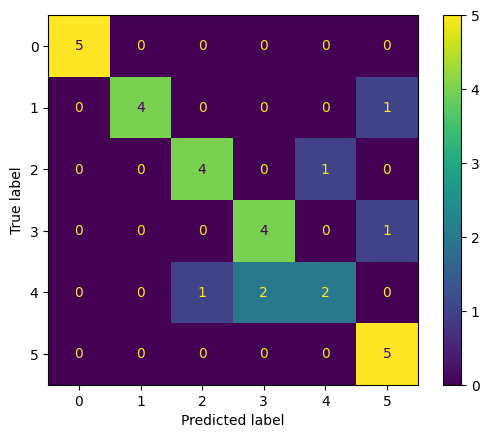

In [29]:
# Visualizing the confusion matrix
cm_rf_mt = confusion_matrix(labels_test_multi,rf_multi_pred,labels=rf_model_multi.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf_mt,display_labels=rf_model_multi.classes_)
disp.plot()
plt.show()

In [30]:
# Calculating the accuracy score
acc_score_rf_mt = accuracy_score(labels_test_multi,rf_multi_pred)
print("The accuracy score is " + str(acc_score_rf_mt))

The accuracy score is 0.8


In [31]:
# Calculating the f1 score
f1_sc_rf_mt = f1_score(labels_test_multi,rf_multi_pred,average=None)
print("The f1 scores are "+str(f1_sc_rf_mt))

The f1 scores are [1.         0.88888889 0.8        0.72727273 0.5        0.83333333]


* Trying out `Logistic Regression`:

In [32]:
from sklearn.linear_model import LogisticRegression

logreg_mt = LogisticRegression(random_state=42).fit(both_features_train_multi, labels_multi)
logreg_multi_pred = logreg_mt.predict(both_features_test_multi)

print(metrics.confusion_matrix(labels_test_multi,logreg_multi_pred))

[[5 0 0 0 0 0]
 [0 0 0 2 2 1]
 [0 1 2 0 2 0]
 [0 2 0 0 2 1]
 [0 0 0 0 5 0]
 [0 0 0 1 1 3]]


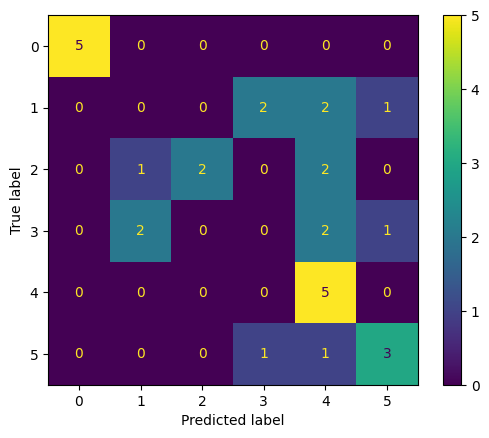

In [33]:
# Visualizing the confusion matrix
cm_logreg_mt = confusion_matrix(labels_test_multi,logreg_multi_pred,labels=logreg_mt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_logreg_mt,display_labels=logreg_mt.classes_)
disp.plot()
plt.show()

In [34]:
# Calculating the accuracy score
acc_score_logreg_mt = accuracy_score(labels_test_multi,logreg_multi_pred)
print("The accuracy score is " + str(acc_score_logreg_mt))

The accuracy score is 0.5


In [35]:
# Calculating the f1 score
f1_sc_logreg_mt = f1_score(labels_test_multi,logreg_multi_pred,average=None)
print("The f1 scores are "+str(f1_sc_logreg_mt))

The f1 scores are [1.         0.         0.57142857 0.         0.58823529 0.6       ]


* Trying out `Multi-layer Perceptron`

In [36]:
from sklearn.neural_network import MLPClassifier

mlp_multi = MLPClassifier(hidden_layer_sizes={140,100},activation="logistic",solver="sgd",alpha=0.00001, learning_rate="adaptive", random_state=42,max_iter=10000).fit(both_features_train_multi,labels_multi)
mlp_multi_pred = mlp_multi.predict(both_features_test_multi)

# Generating the confusion matrix from the true labels and predicted values
print(metrics.confusion_matrix(labels_test_multi,mlp_multi_pred))

[[5 0 0 0 0 0]
 [0 1 1 1 1 1]
 [0 0 3 0 1 1]
 [0 1 1 1 2 0]
 [0 1 0 0 3 1]
 [0 0 0 0 0 5]]


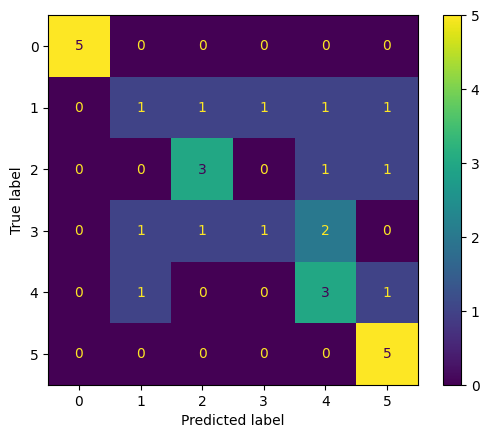

In [37]:
# Visualizing the confusion matrix
cm_mlp_mt = confusion_matrix(labels_test_multi,mlp_multi_pred,labels=mlp_multi.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_mlp_mt,display_labels=mlp_multi.classes_)
disp.plot()
plt.show()

In [38]:
# Calculating the accuracy score
acc_score_logreg_mt = accuracy_score(labels_test_multi,mlp_multi_pred)
print("The accuracy score is " + str(acc_score_logreg_mt))

The accuracy score is 0.6


In [39]:
# Calculating the f1 score
f1_sc_mlp_mt = f1_score(labels_test_multi,mlp_multi_pred,average=None)
print("The f1 scores are "+str(f1_sc_mlp_mt))

The f1 scores are [1.         0.25       0.6        0.28571429 0.5        0.76923077]


    3.2 Binary Learning: Spy vs Nonspy

* Trying out `Random Forest`

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf_model_bin = RandomForestClassifier(random_state=42,n_jobs=-1,n_estimators=200,class_weight="balanced")
rf_model_bin.fit(features_both,labels_bin)

rf_bin_pred = rf_model_bin.predict(features_both_test)

print(metrics.confusion_matrix(labels_bin_test,rf_bin_pred))

[[13  2]
 [ 0 15]]


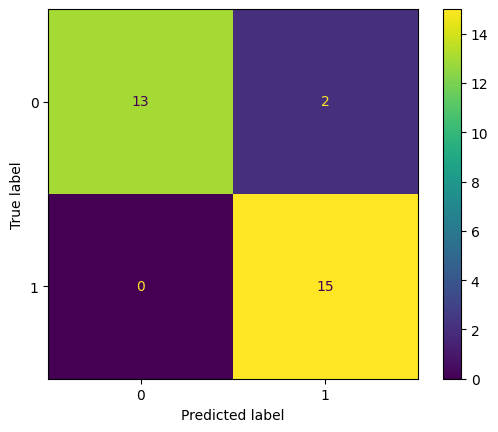

In [41]:
# Visualizing the confusion matrix
cm_rf_bin = confusion_matrix(labels_bin_test,rf_bin_pred,labels=rf_model_bin.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf_bin,display_labels=rf_model_bin.classes_)
disp.plot()
plt.show()

In [42]:
# Calculating the accuracy score
acc_score_rf_bin = accuracy_score(labels_bin_test,rf_bin_pred)
print("The accuracy score is " + str(acc_score_rf_bin))

The accuracy score is 0.9333333333333333


In [43]:
# Calculating the f1 score
f1_sc_rf_bin = f1_score(labels_bin_test,rf_bin_pred,average=None)
print("The f1 scores are "+str(f1_sc_rf_bin))

The f1 scores are [0.92857143 0.9375    ]


* Trying out `Logistic Regression`

In [44]:
logreg_bin = LogisticRegression(random_state=42).fit(features_both, labels_bin)
logreg_bin_pred = logreg_bin.predict(features_both_test)

print(metrics.confusion_matrix(labels_bin_test,logreg_bin_pred))

[[13  2]
 [ 4 11]]


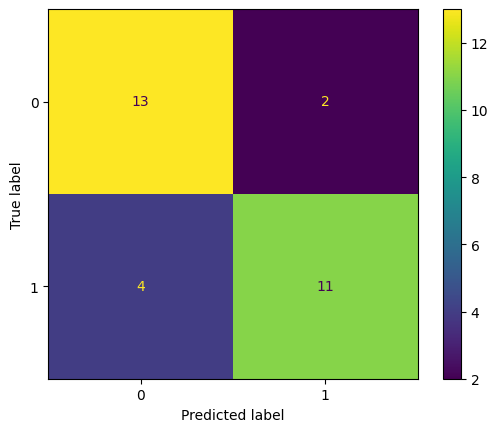

In [45]:
# Visualizing the confusion matrix
cm_logreg_bin = confusion_matrix(labels_bin_test,logreg_bin_pred,labels=logreg_bin.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_logreg_bin,display_labels=logreg_bin.classes_)
disp.plot()
plt.show()

In [46]:
# Calculating the accuracy score
acc_score_logreg_bin = accuracy_score(labels_bin_test,logreg_bin_pred)
print("The accuracy score is " + str(acc_score_logreg_bin))

The accuracy score is 0.8


In [47]:
# Calculating the f1 score
f1_sc_logreg_bin = f1_score(labels_bin_test,logreg_bin_pred,average=None)
print("The f1 scores are "+str(f1_sc_logreg_bin))

The f1 scores are [0.8125     0.78571429]


* Trying out `Multi-layer Perceptron (MLP)`

In [48]:
mlp_bin = MLPClassifier(hidden_layer_sizes={140},activation="logistic",solver="sgd", random_state=42,max_iter=10000).fit(features_both,labels_bin)
mlp_bin_pred = mlp_bin.predict(features_both_test)

# Generating the confusion matrix from the true labels and predicted values
print(metrics.confusion_matrix(labels_bin_test,mlp_bin_pred))

[[13  2]
 [ 3 12]]


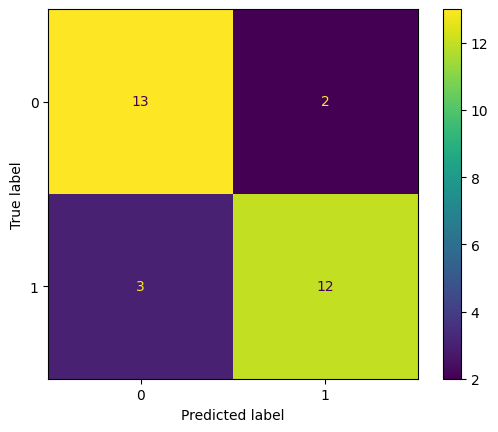

In [49]:
# Visualizing the confusion matrix
cm_mlp_bin = confusion_matrix(labels_bin_test,mlp_bin_pred,labels=mlp_bin.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_mlp_bin,display_labels=mlp_bin.classes_)
disp.plot()
plt.show()

In [50]:
# Calculating the accuracy score
acc_score_mlp_bin = accuracy_score(labels_bin_test,mlp_bin_pred)
print("The accuracy score is " + str(acc_score_mlp_bin))

The accuracy score is 0.8333333333333334


In [51]:
# Calculating the f1 score
f1_sc_mlp_bin = f1_score(labels_bin_test,mlp_bin_pred,average=None)
print("The f1 scores are "+str(f1_sc_mlp_bin))

The f1 scores are [0.83870968 0.82758621]


## Part 4: Unsupervised model

* Trying out `Kernel Density Estimation (KDE)`

In [52]:
from sklearn.model_selection import train_test_split

from netml.ndm.model import MODEL
from netml.ndm.kde import KDE

RANDOM_STATE = 42

# create detection model
kde = KDE(random_state=RANDOM_STATE)
kde.name = 'KDE'

ndm_kde = MODEL(kde, score_metric='auc', verbose=0, random_state=RANDOM_STATE)

# train the model from the train set
ndm_kde.train(features_both)

# evaluate the trained model
ndm_kde.test(features_both_test, labels_bin_test)

# stats
print(ndm_kde.train.tot_time, ndm_kde.test.tot_time, ndm_kde.score)

'_train()' starts at 2022-12-07 13:51:06
'_train()' ends at 2022-12-07 13:51:06 and takes 0.0002 mins.
'_test()' starts at 2022-12-07 13:51:06
'_test()' ends at 2022-12-07 13:51:06 and takes 0.0001 mins.
0.0002 0.0001 0.9066666666666667


* Trying out `One Class SVM(OCSVM)`

In [53]:
from netml.ndm.ocsvm import OCSVM
# create detection model
ocsvm = OCSVM(kernel='rbf', nu=0.5, random_state=RANDOM_STATE)
ocsvm.name = 'OCSVM'
ndm_ocsvm = MODEL(ocsvm, score_metric='auc', verbose=0, random_state=RANDOM_STATE)

# train the model from the train set
ndm_ocsvm.train(features_both,labels_bin)
# evaluate the trained model
ndm_ocsvm.test(features_both_test, labels_bin_test)

# stats
print(ndm_ocsvm.train.tot_time, ndm_ocsvm.test.tot_time, ndm_ocsvm.score)

'_train()' starts at 2022-12-07 13:51:06
'_train()' ends at 2022-12-07 13:51:06 and takes 0.0002 mins.
'_test()' starts at 2022-12-07 13:51:06
'_test()' ends at 2022-12-07 13:51:06 and takes 0.0002 mins.
0.0002 0.0002 0.5288888888888889


* Trying out `Isolation Forest (IF/IForest)`

In [54]:
from netml.ndm.iforest import IF

iforest = IF(n_estimators = 1000, random_state=RANDOM_STATE)
iforest.name = 'IForest'
ndm_iforest = MODEL(iforest, score_metric='auc', verbose=0, random_state=RANDOM_STATE)

# train the model from the train set
ndm_iforest.train(features_both,labels_bin)
# evaluate the trained model
ndm_iforest.test(features_both_test, labels_bin_test)

# stats
print(ndm_iforest.train.tot_time, ndm_iforest.test.tot_time, ndm_iforest.score)

'_train()' starts at 2022-12-07 13:51:06


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    2.3s remaining:    6.9s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    2.5s finished


'_train()' ends at 2022-12-07 13:51:12 and takes 0.1062 mins.
'_test()' starts at 2022-12-07 13:51:12
'_test()' ends at 2022-12-07 13:51:15 and takes 0.0406 mins.
0.1062 0.0406 0.039999999999999994


* Trying out `Gaussian Mixture Model (GMM)`

In [55]:
from netml.ndm.gmm import GMM

# create detection model
gmm = GMM(reg_covar= 1e-2, random_state=RANDOM_STATE)
gmm.name = 'GMM'

ndm_gmm = MODEL(gmm, score_metric='auc', verbose=0, random_state=RANDOM_STATE)

# train the model from the train set
ndm_gmm.train(features_both)

# evaluate the trained model
ndm_gmm.test(features_both_test, labels_bin_test)

# stats
print(ndm_gmm.train.tot_time, ndm_gmm.test.tot_time, ndm_gmm.score)

'_train()' starts at 2022-12-07 13:51:15
'_train()' ends at 2022-12-07 13:51:16 and takes 0.0084 mins.
'_test()' starts at 2022-12-07 13:51:16
'_test()' ends at 2022-12-07 13:51:16 and takes 0.0001 mins.
0.0084 0.0001 0.888888888888889
